In [80]:
import mhcflurry, seaborn, numpy, pandas, pickle, sklearn, collections, scipy, time
import mhcflurry.dataset
import fancyimpute, locale
from matplotlib import pyplot


import sklearn.metrics
import sklearn.cross_validation
%matplotlib inline

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')

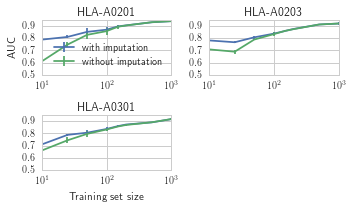

In [84]:
impute_comparison = pandas.read_csv("../data/impute_comparison.csv")

pyplot.figure(figsize=(5,3))
seaborn.set_style("whitegrid")
for (i, (allele, data)) in enumerate(impute_comparison.groupby("allele")):
    pyplot.subplot(2,2, i + 1, sharey=pyplot.gca())
    grouped = data.groupby(["train_size", "impute"]).test_auc.mean().to_frame().reset_index()
    grouped["std_error"] = data.groupby(["train_size", "impute"]).test_auc.std().to_frame().reset_index().test_auc
    for impute in [True, False]:
        sub = grouped[grouped.impute == impute]
        pyplot.errorbar(
                       x=sub.train_size.values,
                       y=sub.test_auc.values,
                       yerr=sub.std_error.values,
                       label=("with" if impute else "without") + " imputation",
                       color=seaborn.get_color_cycle()[0] if impute else seaborn.get_color_cycle()[1])    
    pyplot.title(allele)
    pyplot.xscale("log")
    if i == 0:
        pyplot.ylabel("AUC")
        pyplot.legend(loc='lower right')

    if i == 2:
        pyplot.xlabel("Training set size")
    pyplot.savefig("../figures/impute_comparison.pdf")

#pyplot.legend(loc='lower right', ncol=1, bbox_to_anchor=(2.2,.1))

pyplot.tight_layout()
